In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

In [2]:
x,y=make_moons(n_samples=1000, noise=0.2)

In [3]:
df = {"x1":x[:,0], "x2":x[:,1],"y":y}

In [4]:
dataset = pd.DataFrame(df)

In [5]:
dataset

,x1,x2,y
0,1.042189,0.352821,0
1,-0.165486,0.984553,0
2,-0.206961,0.999863,0
3,0.244118,-0.344328,1
4,0.195087,-0.184584,1
...,...,...,...
995,-0.954402,0.682154,0
996,0.633775,0.593428,0
997,1.570533,0.706831,0
998,0.189277,0.852730,0


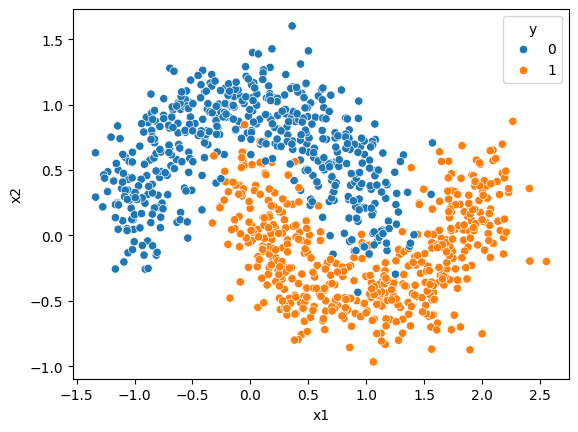

In [6]:
sns.scatterplot(x="x1",y="x2",data=dataset,hue="y")
plt.show()

In [7]:
x_a = dataset.iloc[:,:-1]
y_a = dataset["y"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [11]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100, dt.score(x_test,y_test)*100

(100.0, 94.0)

In [12]:
sv = SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100, sv.score(x_test,y_test)*100

(95.875, 96.5)

In [20]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)*100, gnb.score(x_test,y_test)*100

(86.0, 88.5)

In [14]:
from sklearn.ensemble import VotingClassifier

In [15]:
li = [("dt1",DecisionTreeClassifier()), ("sv1",SVC()), ("gnb1",GaussianNB())]

In [16]:
vc = VotingClassifier(li, weights=[5,4,7])
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb1', GaussianNB())],
                 weights=[5, 4, 7])

In [17]:
vc.score(x_train,y_train)*100, vc.score(x_test,y_test)*100

(97.125, 96.5)

In [18]:
prd = {"dt":dt.predict(x_test),"svm":sv.predict(x_test),"gnb":gnb.predict(x_test),"vc":vc.predict(x_test)}

In [19]:
pd.DataFrame(prd).head(20)

,dt,svm,gnb,vc
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,0,0,0,0
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,1,1,1,1
9,1,1,1,1
